<a href="https://colab.research.google.com/github/imuneeb33/Ai-Companion/blob/main/AiCom_TwitterSentimentAnalysisDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np


In [3]:


# create a dictionary with data
data = {'name': ['John', 'Jane', 'Bob', 'Emily'],
        'age': [25, 30, 20, 35],
        'country': ['USA', 'Canada', 'Australia', 'UK']}

# create a DataFrame from the dictionary
df = pd.DataFrame(data)

# print the DataFrame
print(df)

    name  age    country
0   John   25        USA
1   Jane   30     Canada
2    Bob   20  Australia
3  Emily   35         UK


In [4]:
# Select relevant columns and rename them

# Read in data from CSV file
df = pd.read_csv('airline_tweets.csv', usecols=['text', 'airline_sentiment'])

# Rename columns
df = df.rename(columns={'airline_sentiment': 'sentiment'})

In [5]:
# Map sentiment labels to numerical values
sentiment_map = {'negative': 0, 'neutral': 1, 'positive': 2}
df['sentiment'] = df['sentiment'].map(sentiment_map)


In [6]:
# Print the first 5 rows of the dataframe to check if it's loaded correctly
print(df.head())



   sentiment                                               text
0          1                @VirginAmerica What @dhepburn said.
1          2  @VirginAmerica plus you've added commercials t...
2          1  @VirginAmerica I didn't today... Must mean I n...
3          0  @VirginAmerica it's really aggressive to blast...
4          0  @VirginAmerica and it's a really big bad thing...


In [7]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['text'], df['sentiment'], test_size=0.2, random_state=42)


In [8]:
# Preprocess the text data
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Convert all text to lowercase
    text = text.lower()

    # Remove numbers and punctuation
    text = re.sub('[^a-zA-Z]', ' ', text)

    # Tokenize text into words
    words = text.split()

    # Remove stop words
    words = [word for word in words if not word in stop_words]

    # Join the remaining words back into a string
    text = ' '.join(words)

    return text

X_train = X_train.apply(preprocess_text)
X_test = X_test.apply(preprocess_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [9]:
# Train a Naive Bayes classifier on the preprocessed data
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

text_clf = Pipeline([
    ('vect', CountVectorizer()),
    ('clf', MultinomialNB()),
])

text_clf.fit(X_train, y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('clf', MultinomialNB())])

In [11]:
airline_sentiment = df['sentiment']


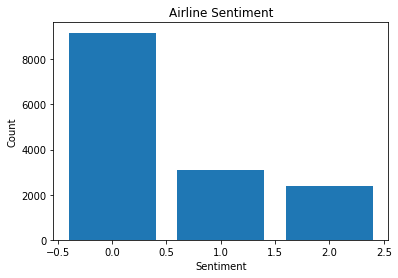

In [12]:
import matplotlib.pyplot as plt

# Count the number of each sentiment
counts = airline_sentiment.value_counts()

# Plot the count of each sentiment as a bar chart
plt.bar(counts.index, counts)
plt.title('Airline Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [13]:

# Test the trained classifier on the testing set
from sklearn.metrics import classification_report

y_pred = text_clf.predict(X_test)

In [14]:

# Test the trained classifier on the testing set
from sklearn.metrics import classification_report

y_pred = text_clf.predict(X_test)